In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
from src.dataset_generator import DatasetGenerator
from src.datasets import GraphemesDataset
import os

selected_scripts = ["Hieroglyph", "Proto-Sinaitic", "Phoenician", "Ancient North-Arabian",
                        "Ancient South-Arabian", "Ge'ez", "Paleo-Hebrew", "Samaritan", "Aramaic", "Syriac",
                        "Hebrew", "Nabataean", "Arabic"]
font_encoding_file = "data/encoding/dotless_encoding.csv"
fonts_dir = "data/fonts/"

generate_data = True

# showcase letter
letter = "aleph"

ds_dir_format = "datasets/eval/{0}_dataset/"
# dataset categories
base_ds_dir = ds_dir_format.format("base")
moderate_ds_dir = ds_dir_format.format("moderate")
rich_moderate_ds_dir = ds_dir_format.format("rich_moderate")
rotation_ds_dir = ds_dir_format.format("rotation")
rich_rotation_ds_dir = ds_dir_format.format("rich_rotation")


In [21]:
dataset_generator = DatasetGenerator(font_encoding_file, base_ds_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=False,
                                     rotation_dist=(0,0),
                                     sizes=[22],
                                     max_augmentations=1)
# print total number of graphemes for letter
print(f"Total number of graphemes for {letter}:", dataset_generator.get_final_graphemes_count().loc[letter].sum())
# print total number of graphemes
print("Total number of graphemes:", dataset_generator.get_final_graphemes_count().sum().sum())
if generate_data:
    dataset_generator.generate_dataset()


Total number of graphemes for aleph: 381
Total number of graphemes: 9610


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/src/dataset_generator.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.scripts, rotation=45, ha='right')


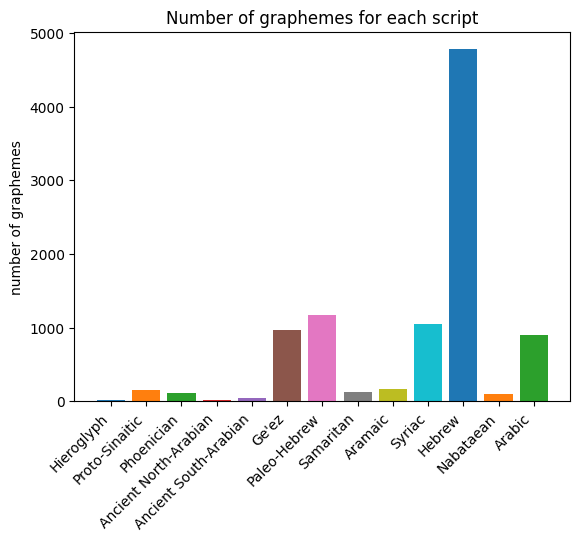

In [4]:
dataset_generator.plot_graphemes_count()

In [5]:
base_ds_dir

'datasets/base_dataset/'

In [6]:
# if not exist unzip aleph from base_ds_dir
if not os.path.isdir(f'{base_ds_dir}/{letter}'):
    os.system(f'unzip -qq {base_ds_dir}/{letter}.zip')
base_dataset = GraphemesDataset(base_ds_dir, by_letter=letter, test_size=1)

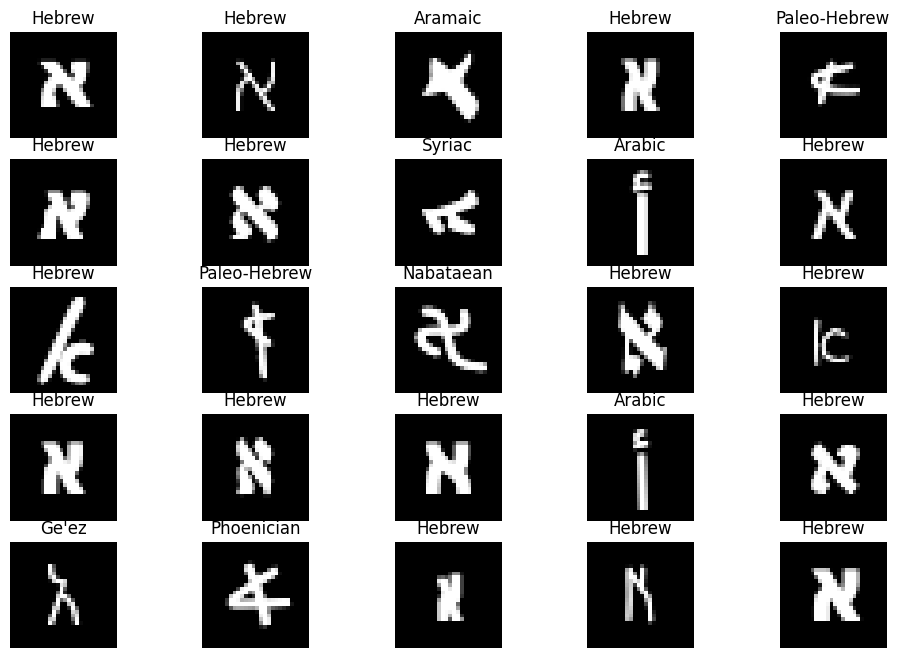

In [7]:
# plot the first 25 images in the train dataset
fig, axes = plt.subplots(5, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    image, label = base_dataset[i]
    ax.imshow(image[:, :, 0], cmap='gray')
    ax.set_title(base_dataset.classes[label])
    ax.axis('off')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def gather_data_by_class(dataset, M, n_classes=13):
    class_data = {}
    for image, label in dataset:
        label = dataset.classes[label]
        if label not in class_data:
            class_data[label] = []
        if len(class_data[label]) < M:
            class_data[label].append(image)
        if all(len(images) >= M for images in class_data.values()):
            break
    return class_data

def plot_images_in_grid(class_data, M):
    num_classes = len(class_data)
    num_rows = len(class_data[list(class_data.keys())[0]])
    num_cols = num_classes

    fig, ax = plt.subplots(1, 1, figsize=(12, M + 2))
    ax.set_facecolor('black')
    ax.set_xticks([])
    ax.set_yticks([])

    for i, (label, images) in enumerate(class_data.items()):
        x, y = (i + 0.5) / num_classes, 1.01
        ax.text(x, y, label, fontsize=16, ha='center', va='bottom', rotation=90)
        for j in range(min(num_rows, len(images))):
            image = images[j]
            ax_index = j * num_classes + i + 1
            ax_ij = fig.add_subplot(num_rows, num_cols, ax_index)
            ax_ij.imshow(image[:, :, 0], cmap='gray')
            ax_ij.axis('off')

    plt.tight_layout()
    plt.show()


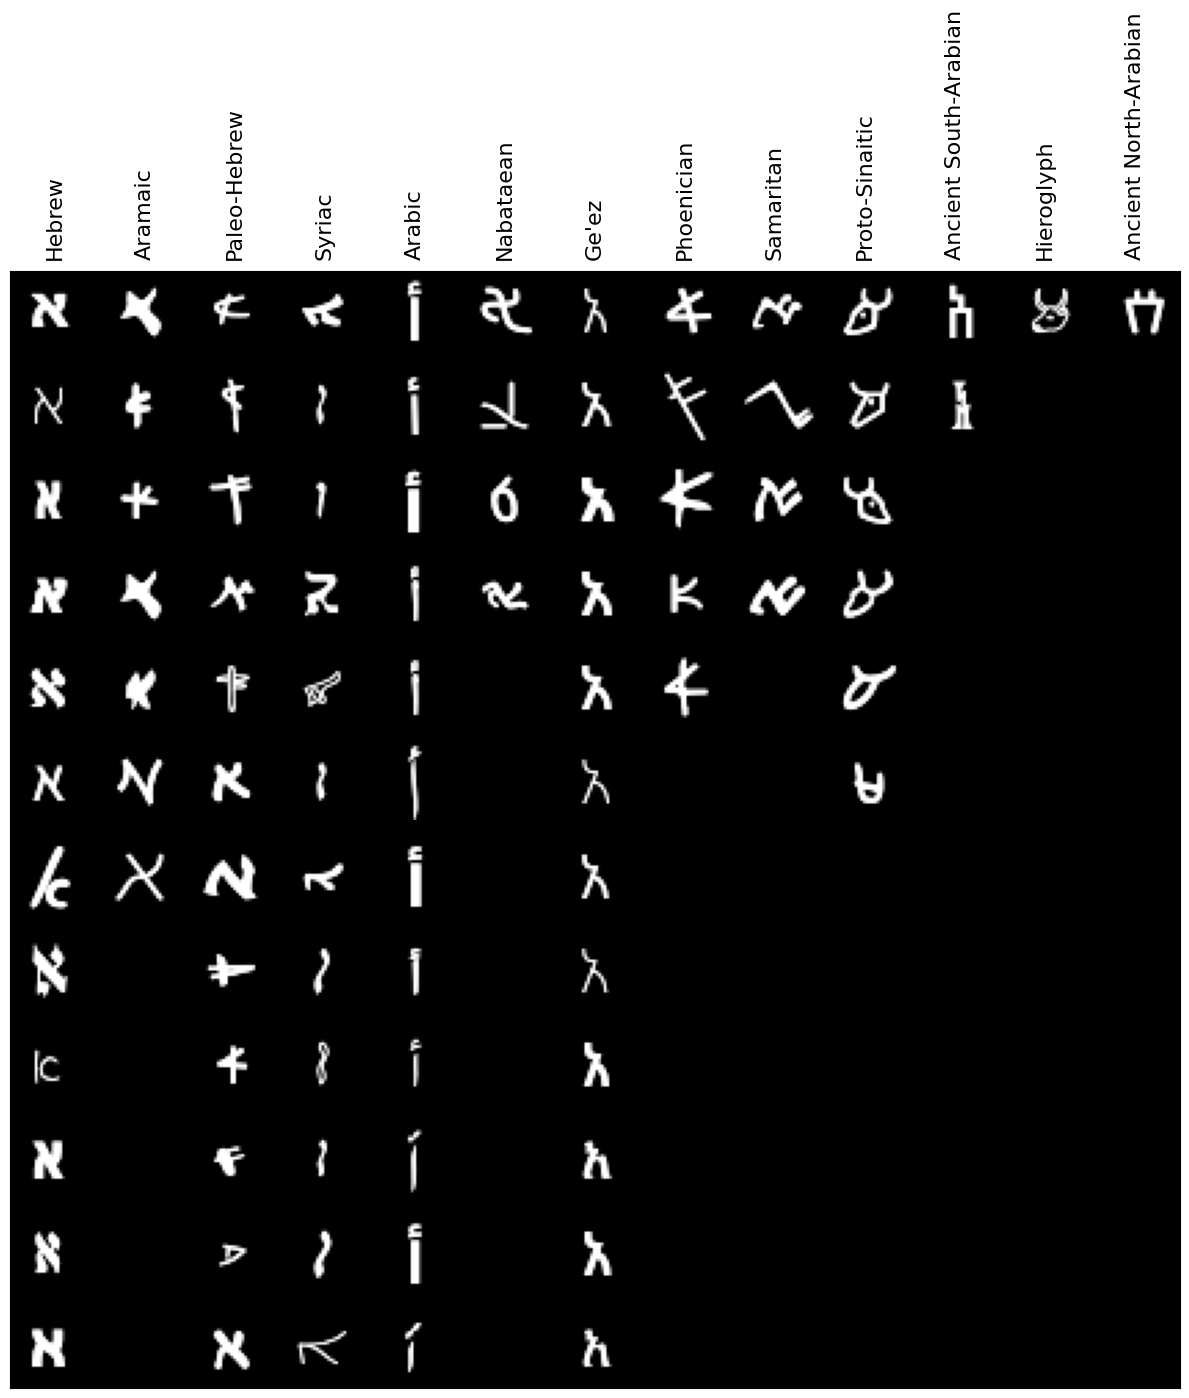

In [9]:
M = 12
class_data = gather_data_by_class(base_dataset, M, len(base_dataset.classes))
plot_images_in_grid(class_data, M)

# Moderate Data Augmentation

In [3]:
# vary sizes, allow translation and slight rotation (mean 0, std 5)
# and allow up to 10 augmentations per grapheme
dataset_generator = DatasetGenerator(font_encoding_file, moderate_ds_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,5),
                                     sizes=range(20, 26),
                                     max_augmentations=10)
# print total number of graphemes for letter
print(f"Total number of graphemes for {letter}:", dataset_generator.get_final_graphemes_count().loc[letter].sum())
# print total number of graphemes
print("Total number of graphemes:", dataset_generator.get_final_graphemes_count().sum().sum())
if generate_data:
    dataset_generator.generate_dataset()

Total number of graphemes for aleph: 1271
Total number of graphemes: 33645
aleph
bet
gimmel
dalet
he
waw
zayin
het
tet
yod
kaph
lamed
mem
nun
samekh
ayin
pe
tsadi
qoph
resh
shin
taw
Finished
total number of images generated: 33645
Number of images generated for each letter: {'aleph': 1271, 'bet': 1292, 'gimmel': 1359, 'dalet': 1307, 'he': 1323, 'waw': 1272, 'zayin': 1258, 'het': 1323, 'tet': 1294, 'yod': 1291, 'kaph': 2325, 'lamed': 1327, 'mem': 2292, 'nun': 2322, 'samekh': 1313, 'ayin': 1325, 'pe': 2199, 'tsadi': 2340, 'qoph': 1287, 'resh': 1278, 'shin': 1407, 'taw': 1240}


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/src/dataset_generator.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.scripts, rotation=45, ha='right')


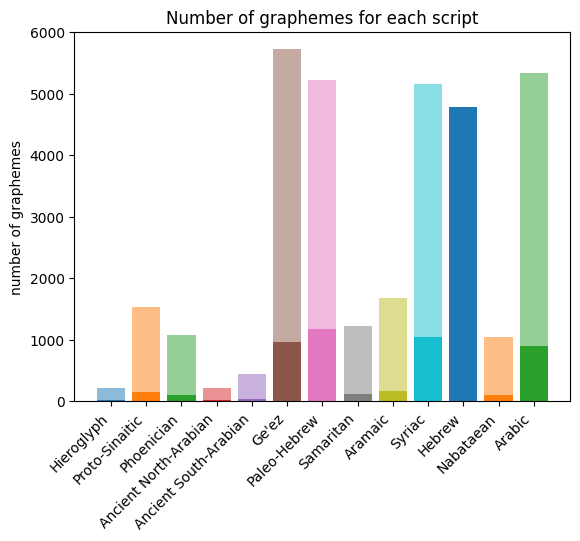

In [11]:
dataset_generator.plot_graphemes_count()

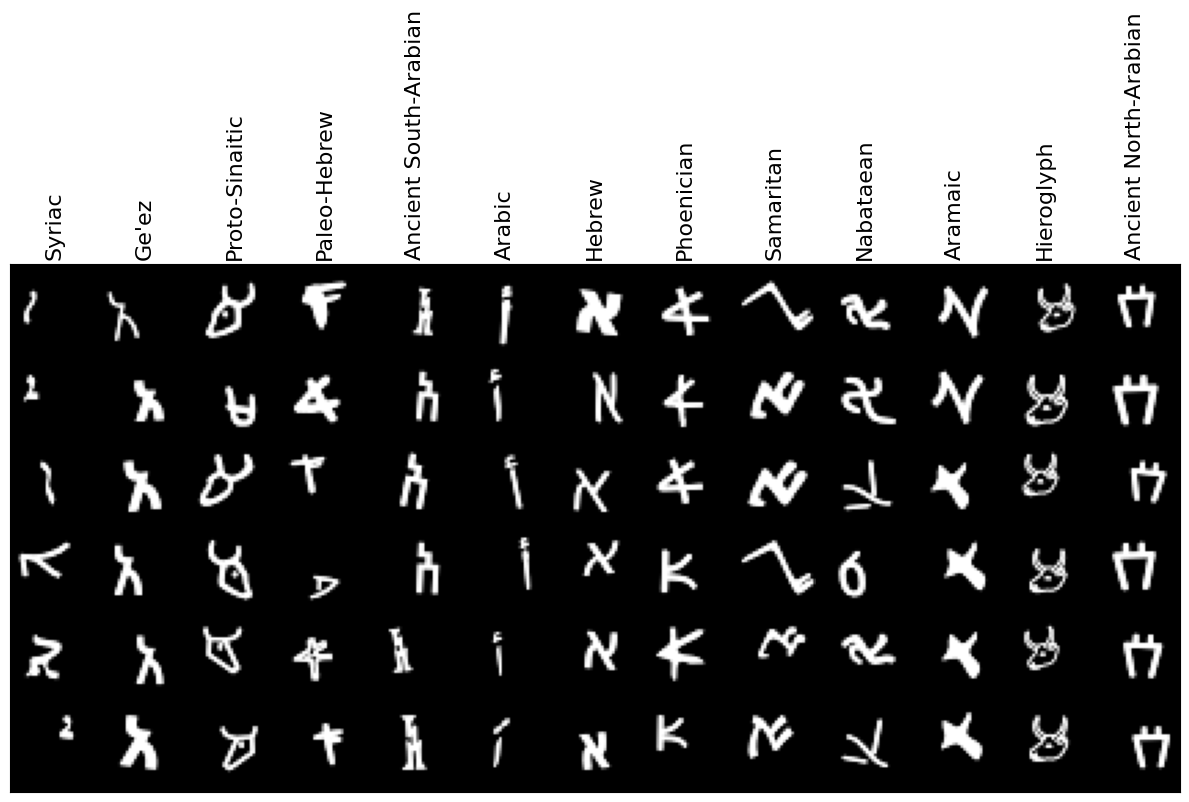

In [8]:
if not os.path.isdir(f'{moderate_ds_dir}/{letter}'):
    os.system(f'unzip -qq {moderate_ds_dir}/{letter}.zip')

moderate_dataset = GraphemesDataset(moderate_ds_dir, by_letter=letter, test_size=1)
M = 6
class_data = gather_data_by_class(moderate_dataset, M, len(moderate_dataset.classes))
plot_images_in_grid(class_data, M)

# x10 times more data augmentation

In [9]:
# repeat the data augmentation process 10 times to have a bigger dataset.
dataset_generator = DatasetGenerator(font_encoding_file, rich_moderate_ds_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,5),
                                     sizes=range(20, 26),
                                     repetitions=10,
                                     max_augmentations=10)
# print total number of graphemes for letter
print(f"Total number of graphemes for {letter}:", dataset_generator.get_final_graphemes_count().loc[letter].sum())
# print total number of graphemes
print("Total number of graphemes:", dataset_generator.get_final_graphemes_count().sum().sum())
if generate_data:
    dataset_generator.generate_dataset()
dataset_generator.plot_graphemes_count()

Total number of graphemes for aleph: 12710
Total number of graphemes: 336450
aleph


KeyboardInterrupt: 

# Dataset with strong rotations

In [10]:
dataset_generator = DatasetGenerator(font_encoding_file, rotation_ds_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,45),
                                     sizes=range(20, 26),
                                     max_augmentations=10)
dataset_generator.generate_dataset()

aleph
bet
gimmel
dalet
he
waw
zayin
het
tet
yod
kaph
lamed
mem
nun
samekh
ayin
pe
tsadi
qoph
resh
shin
taw
Finished
total number of images generated: 33645
Number of images generated for each letter: {'aleph': 1271, 'bet': 1292, 'gimmel': 1359, 'dalet': 1307, 'he': 1323, 'waw': 1272, 'zayin': 1258, 'het': 1323, 'tet': 1294, 'yod': 1291, 'kaph': 2325, 'lamed': 1327, 'mem': 2292, 'nun': 2322, 'samekh': 1313, 'ayin': 1325, 'pe': 2199, 'tsadi': 2340, 'qoph': 1287, 'resh': 1278, 'shin': 1407, 'taw': 1240}


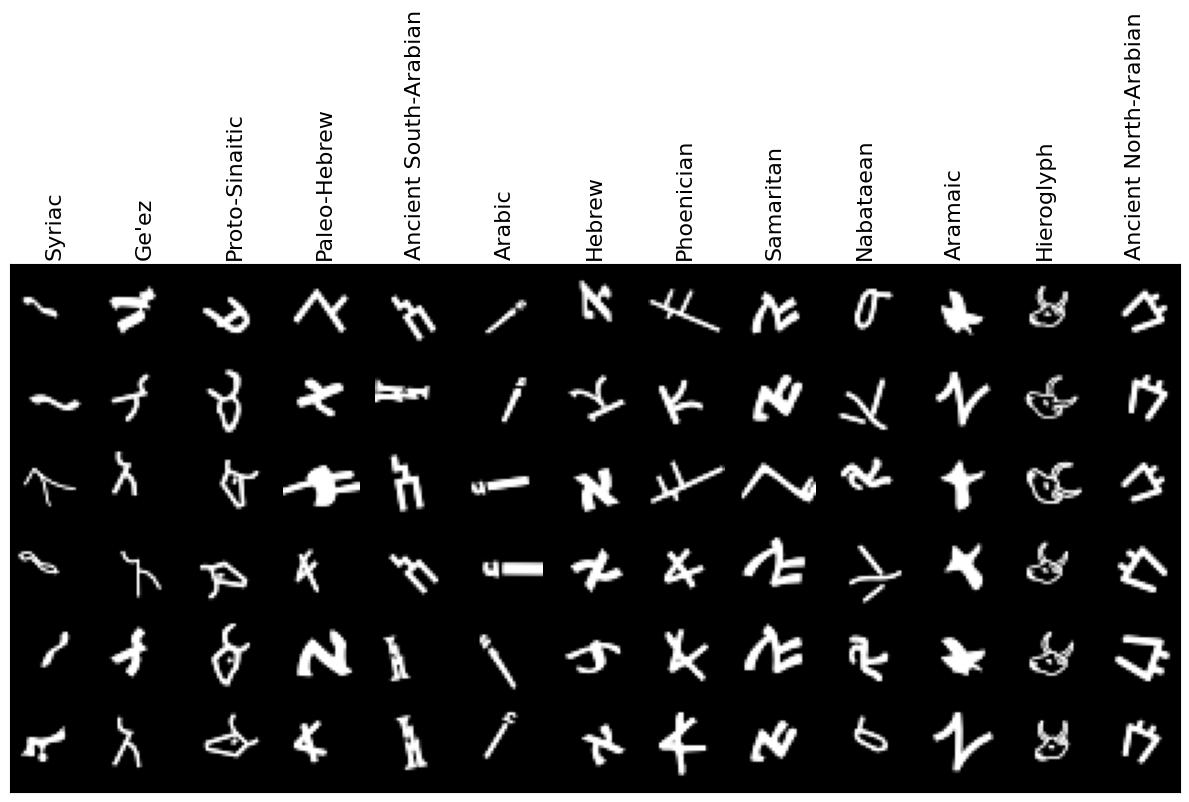

In [11]:
if not os.path.isdir(f'{rotation_ds_dir}/{letter}'):
    os.system(f'unzip -qq {rotation_ds_dir}/{letter}.zip')

rotations_dataset = GraphemesDataset(rotation_ds_dir, by_letter=letter, test_size=1)

M = 6
class_data = gather_data_by_class(rotations_dataset, M, len(rotations_dataset.classes))
plot_images_in_grid(class_data, M)

# x10 times more rotated data augmentation

aleph
bet
gimmel
dalet
he
waw
zayin
het
tet
yod
kaph
lamed
mem
nun
samekh
ayin
pe
tsadi
qoph
resh
shin
taw
Finished
total number of images generated: 336450
Number of images generated for each letter: {'aleph': 12710, 'bet': 12920, 'gimmel': 13590, 'dalet': 13070, 'he': 13230, 'waw': 12720, 'zayin': 12580, 'het': 13230, 'tet': 12940, 'yod': 12910, 'kaph': 23250, 'lamed': 13270, 'mem': 22920, 'nun': 23220, 'samekh': 13130, 'ayin': 13250, 'pe': 21990, 'tsadi': 23400, 'qoph': 12870, 'resh': 12780, 'shin': 14070, 'taw': 12400}


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/src/dataset_generator.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.scripts, rotation=45, ha='right')


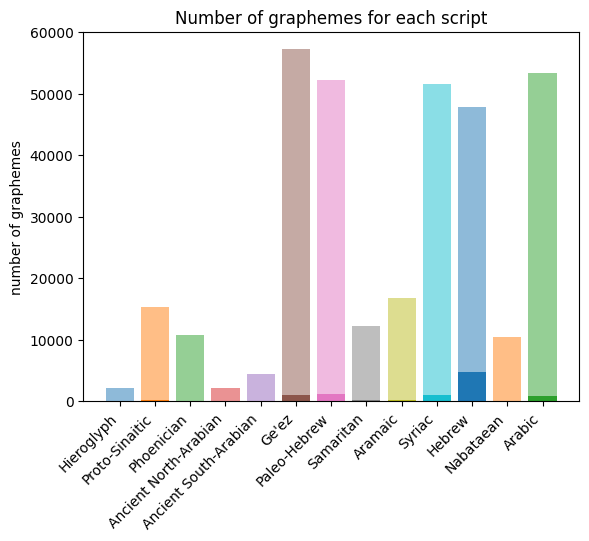

In [16]:
# repeat the data augmentation process 10 times to have a bigger dataset.
dataset_generator = DatasetGenerator(font_encoding_file, rich_rotation_ds_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,45),
                                     sizes=range(20, 26),
                                     repetitions=10,
                                     max_augmentations=10)
# print total number of graphemes for letter
print("Total number of graphemes for {letter}:", dataset_generator.graphemes_count[letter].sum())
# print total number of graphemes
print("Total number of graphemes:", dataset_generator.graphemes_count.sum().sum())
dataset_generator.generate_dataset()
dataset_generator.plot_graphemes_count()